In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
from google.colab import files
upload = files.upload()


Saving properties.csv to properties.csv


In [69]:
data = 'properties.csv'
df = pd.read_csv(data, header=None, sep=',')
df.head()

,0,1,2,3,4,5,6
0,type,title,location,bedroom,bathroom,size_sqm,price
1,Duplex,Prime Location Duplex Fully Finished With A\C,"Park View, North Investors Area, New Cairo Cit...",4,4,345,"6,850,000"
2,Villa,Town house resale at Mivida Emaar with best price,"Mivida, 5th Settlement Compounds, The 5th Sett...",3,3,285,"10,000,000"
3,Apartment,Lake View Residence - Apartment | Prime Location,"Lake View Residence, 5th Settlement Compounds,...",3,3,210,"5,700,000"
4,Townhouse,Best Penthouse for sale in villette ( sky conds ),"La Vista City, New Capital Compounds, New Capi...",4,4,230,"7,510,000"


In [70]:
df.shape

(11419, 7)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11419 entries, 0 to 11418
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11419 non-null  object
 1   1       11419 non-null  object
 2   2       11419 non-null  object
 3   3       11419 non-null  object
 4   4       11419 non-null  object
 5   5       11419 non-null  object
 6   6       11419 non-null  object
dtypes: object(7)
memory usage: 624.6+ KB


In [72]:
col_names = ['type','title','location','bedroom', 'bathroom', 'size_sqm', 'price']
df.columns = col_names
df.head()

,type,title,location,bedroom,bathroom,size_sqm,price
0,type,title,location,bedroom,bathroom,size_sqm,price
1,Duplex,Prime Location Duplex Fully Finished With A\C,"Park View, North Investors Area, New Cairo Cit...",4,4,345,"6,850,000"
2,Villa,Town house resale at Mivida Emaar with best price,"Mivida, 5th Settlement Compounds, The 5th Sett...",3,3,285,"10,000,000"
3,Apartment,Lake View Residence - Apartment | Prime Location,"Lake View Residence, 5th Settlement Compounds,...",3,3,210,"5,700,000"
4,Townhouse,Best Penthouse for sale in villette ( sky conds ),"La Vista City, New Capital Compounds, New Capi...",4,4,230,"7,510,000"


In [77]:
df['bathroom'] = pd.to_numeric(df['bathroom'], errors='coerce')
df['bedroom'] = pd.to_numeric(df['bedroom'], errors='coerce')
df['size_sqm'] = pd.to_numeric(df['size_sqm'].astype(str).str.replace(',', ''), errors='coerce')
df['price'] = pd.to_numeric(df['price'].astype(str).str.replace(',', ''), errors='coerce')

# Define categorical and quantitative variables
categorical = df.select_dtypes(include=['object']).columns.tolist()
print('These are the categorical variables: ')
print(categorical)
quantitative = df.select_dtypes(include=['number']).columns.tolist()
print('These are the quantitative variables: ')
print(quantitative)




These are the categorical variables: 
['type', 'title', 'location']
These are the quantitative variables: 
['bedroom', 'bathroom', 'size_sqm', 'price']


In [21]:
df[categorical].head()

,type,title,location
0,type,title,location
1,Duplex,Prime Location Duplex Fully Finished With A\C,"Park View, North Investors Area, New Cairo Cit..."
2,Villa,Town house resale at Mivida Emaar with best price,"Mivida, 5th Settlement Compounds, The 5th Sett..."
3,Apartment,Lake View Residence - Apartment | Prime Location,"Lake View Residence, 5th Settlement Compounds,..."
4,Townhouse,Best Penthouse for sale in villette ( sky conds ),"La Vista City, New Capital Compounds, New Capi..."


In [22]:
for var in categorical:
    print('**************************')
    print(var)
    print('---------------------------')
    print(df[var].value_counts())

**************************
type
---------------------------
type
Apartment          5848
Villa              2845
Townhouse           858
Twin House          601
Duplex              568
Penthouse           448
iVilla              199
Hotel Apartment      34
Chalet               14
Compound              3
type                  1
Name: count, dtype: int64
**************************
title
---------------------------
title
Villa for sale In Lake View L:600 BUE:550 price18M    14
2 bedrooms|2 bath|Terrace|with disc                   13
STANDALONE in Palm Hills Katameya EX.PK2 For Sale     13
3 bedrooms|7 years install|Ready to move|Disc 12%     12
TWIN HOUSE in Palm Hills Katameya PK1 For Sale         9
                                                      ..
Pay Only 5% DP | Over 9 Years by Tatweer Misr          1
Apartment 88 m fully finished without over loading     1
Penthouse In Katameya Plaza Sodic Fully Finished       1
Penthouse for sale in Katamya Plaza - sodic            1
Very pri

In [23]:
df.price.unique()

array([      nan,  6850000., 10000000., ...,  1837500., 10276891.,
        4554066.])

In [33]:
df['price'].replace('Ask',np.NaN, inplace=True)
df_cleaned = df.dropna()
df_cleaned.head()

,type,title,location,bedroom,bathroom,size_sqm,price
1,Duplex,Prime Location Duplex Fully Finished With A\C,"Park View, North Investors Area, New Cairo Cit...",4.0,4.0,345.0,6850000.0
2,Villa,Town house resale at Mivida Emaar with best price,"Mivida, 5th Settlement Compounds, The 5th Sett...",3.0,3.0,285.0,10000000.0
3,Apartment,Lake View Residence - Apartment | Prime Location,"Lake View Residence, 5th Settlement Compounds,...",3.0,3.0,210.0,5700000.0
4,Townhouse,Best Penthouse for sale in villette ( sky conds ),"La Vista City, New Capital Compounds, New Capi...",4.0,4.0,230.0,7510000.0
5,Penthouse,2nd Floor | Fully Finished | Lowest Price |Par...,"Villette, 5th Settlement Compounds, The 5th Se...",5.0,6.0,284.0,8511300.0


In [39]:
df.price.unique()

array(['price', '6,850,000', '10,000,000', ..., '1,837,500', '10,276,891',
       '4,554,066'], dtype=object)

In [35]:
nulls_in_categorical = df[categorical].isnull().sum()
print("Null values in categorical variables:\n", nulls_in_categorical)

Null values in categorical variables:
 type        0
title       0
location    0
dtype: int64


In [37]:
nulls_in_quantitative = df[quantitative].isnull().sum()
print("Null values in quantitative variables:\n", nulls_in_quantitative)

Null values in quantitative variables:
 bedroom     39
bathroom     1
size_sqm     1
price        0
dtype: int64


In [43]:
# Handling null values in quantitative variables by filling them with the median of each column
df[quantitative] = df[quantitative].fillna(df[quantitative].median())

# Verify the changes
nulls_in_quantitative_after = df[quantitative].isnull().sum()
print("Null values in quantitative variables after handling:\n", nulls_in_quantitative_after)

Null values in quantitative variables after handling:
 bedroom     0
bathroom    0
size_sqm    0
price       0
dtype: int64


In [44]:
# Final check to ensure no null values remain
final_nulls = df.isnull().sum()
print("Final null values check:\n", final_nulls)

Final null values check:
 type        0
title       0
location    0
bedroom     0
bathroom    0
size_sqm    0
price       0
dtype: int64


            bedroom      bathroom      size_sqm         price
count  11419.000000  11419.000000  1.141900e+04  1.141900e+04
mean       3.452054      3.328575  1.147095e+04  6.804688e+06
std        1.173826      1.311963  4.384671e+05  9.062975e+06
min        1.000000      1.000000  1.000000e+00  1.000000e+06
25%        3.000000      2.000000  1.650000e+02  2.500000e+06
50%        3.000000      3.000000  2.200000e+02  3.907217e+06
75%        4.000000      4.000000  3.280000e+02  7.700000e+06
max        8.000000      8.000000  2.665000e+07  4.182527e+08


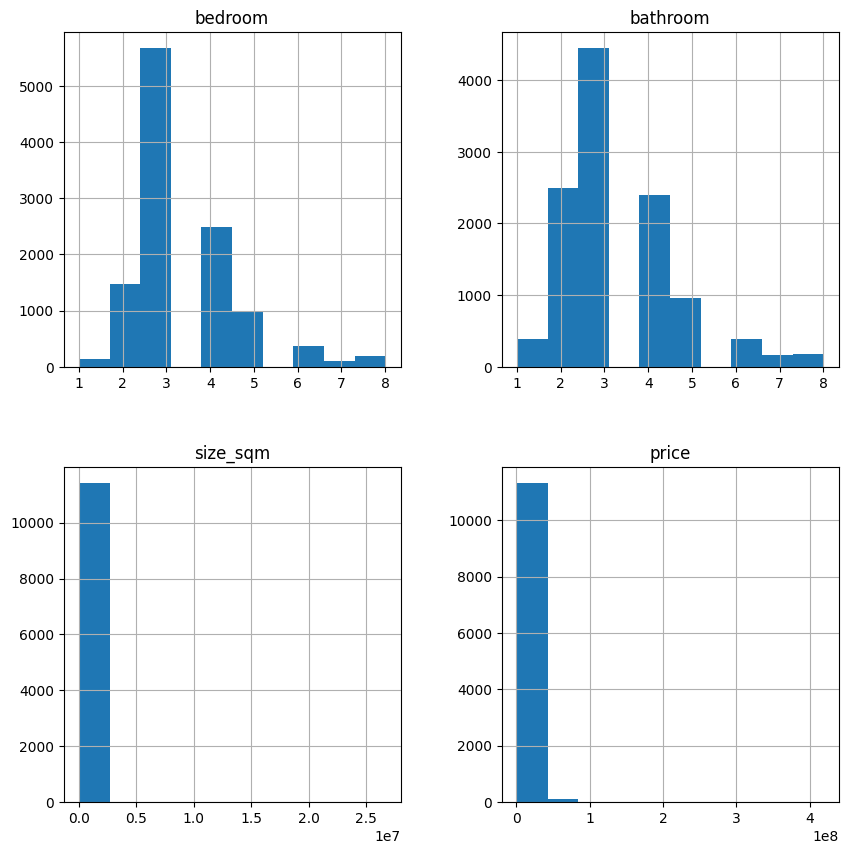

In [53]:
# Summary statistics
print(df.describe())

# Histogram
df.hist(figsize=(10, 10))
plt.show()

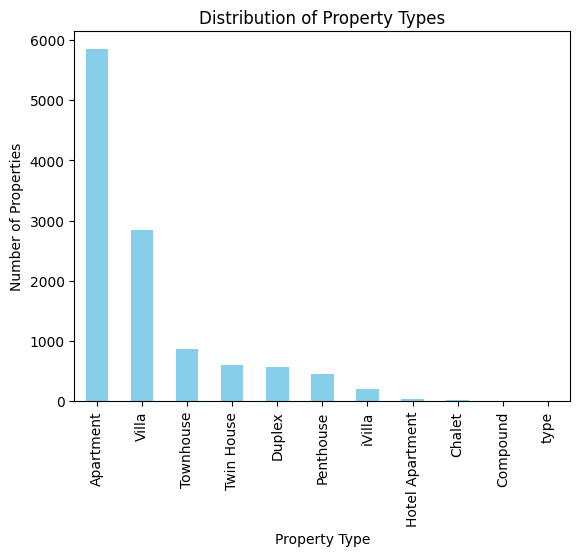

In [45]:
# A bar chart is ideal for comparing the frequency of different categories


property_type_counts = df['type'].value_counts()

property_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.show()

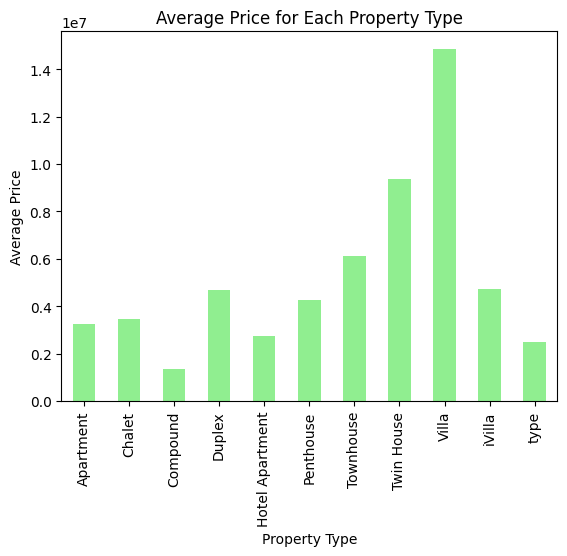

In [46]:
#Bar charts are useful for comparing average values across categories

avg_price_per_type = df.groupby('type')['price'].mean()

avg_price_per_type.plot(kind='bar', color='lightgreen')
plt.title('Average Price for Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.show()

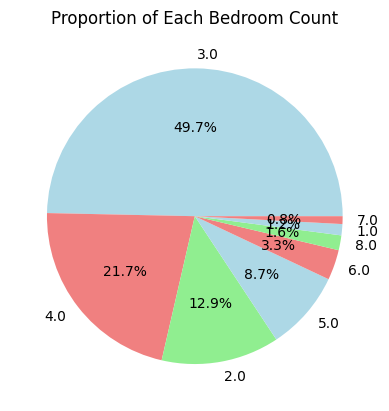

In [47]:
#Pie charts are good for showing the proportions of categories within a whole

bedroom_counts = df['bedroom'].value_counts()


bedroom_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Proportion of Each Bedroom Count')
plt.ylabel('')
plt.show()

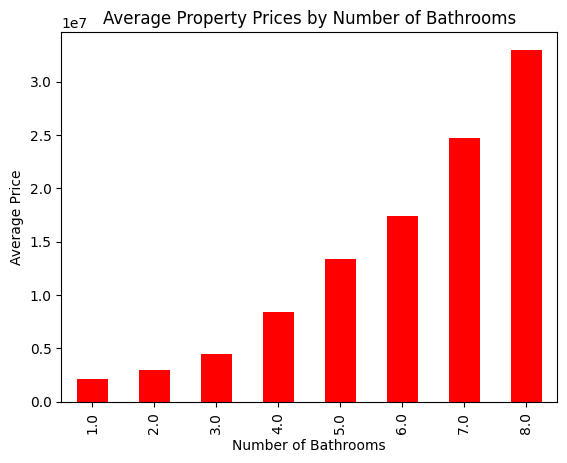

In [56]:
# Calculate average price for each bathroom count
avg_price_per_bathroom = df.groupby('bathroom')['price'].mean()

# Plot a bar chart
avg_price_per_bathroom.plot(kind='bar', color='red')
plt.title('Average Property Prices by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.show()

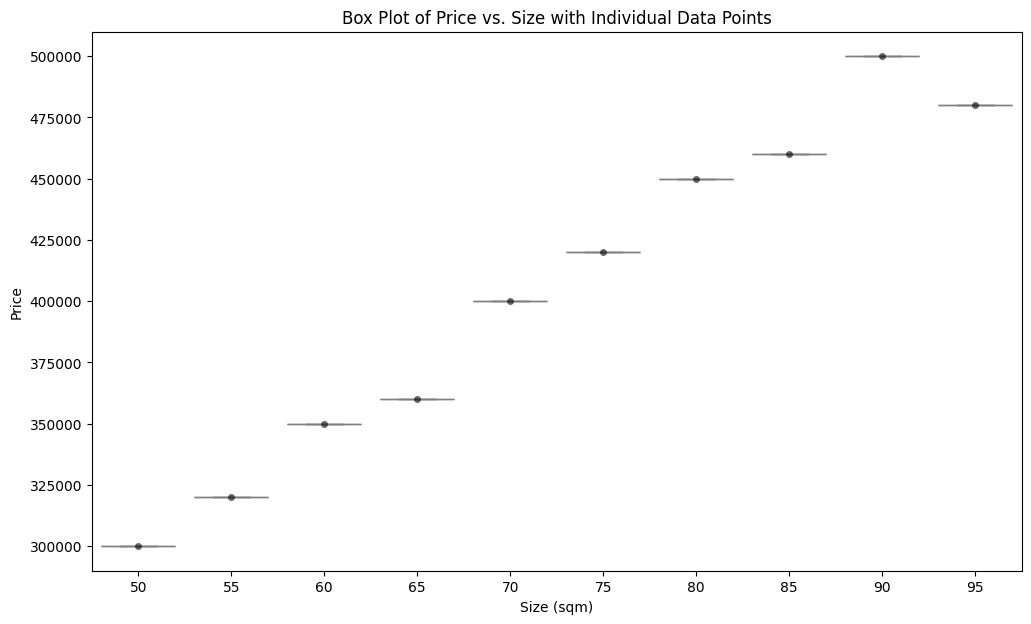

In [57]:
data = pd.DataFrame({
    'price': [300000, 350000, 400000, 450000, 500000, 320000, 360000, 420000, 460000, 480000],
    'size_sqm': [50, 60, 70, 80, 90, 55, 65, 75, 85, 95]
})

# Create the combined plot
plt.figure(figsize=(12, 7))

# Box plot
sns.boxplot(x='size_sqm', y='price', data=data, color='lightgray')

# Strip plot (to show individual data points)
sns.stripplot(x='size_sqm', y='price', data=data, jitter=True, color='black', alpha=0.6)

# Add titles and labels
plt.title('Box Plot of Price vs. Size with Individual Data Points')
plt.xlabel('Size (sqm)')
plt.ylabel('Price')

# Show the plot
plt.show()

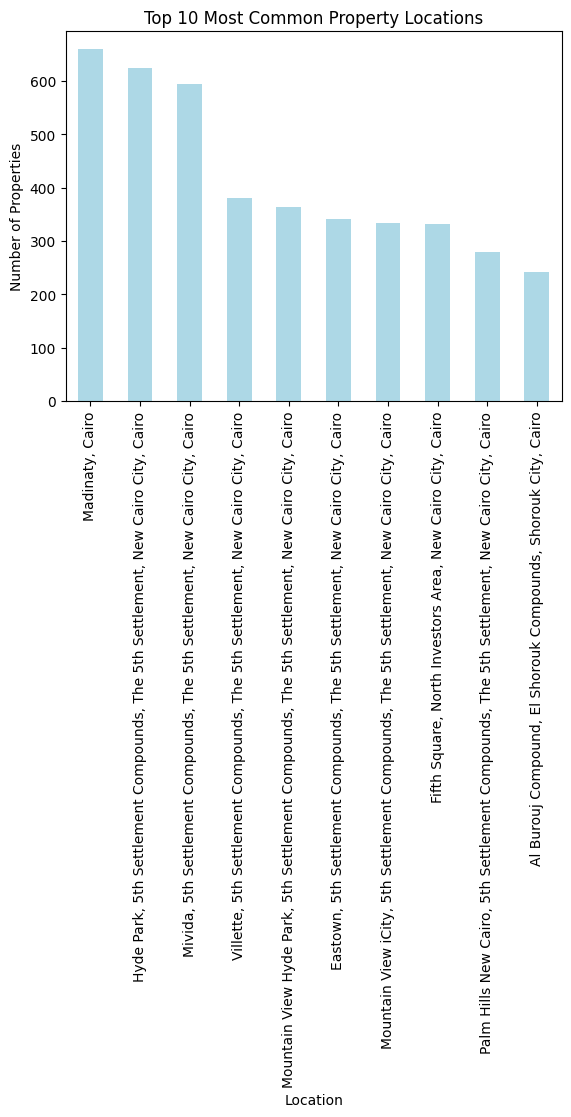

In [55]:
location_counts = df['location'].value_counts().head(10)  # Top 10 locations

# Plot a bar chart
location_counts.plot(kind='bar', color='lightblue')
plt.title('Top 10 Most Common Property Locations')
plt.xlabel('Location')
plt.ylabel('Number of Properties')
plt.show()

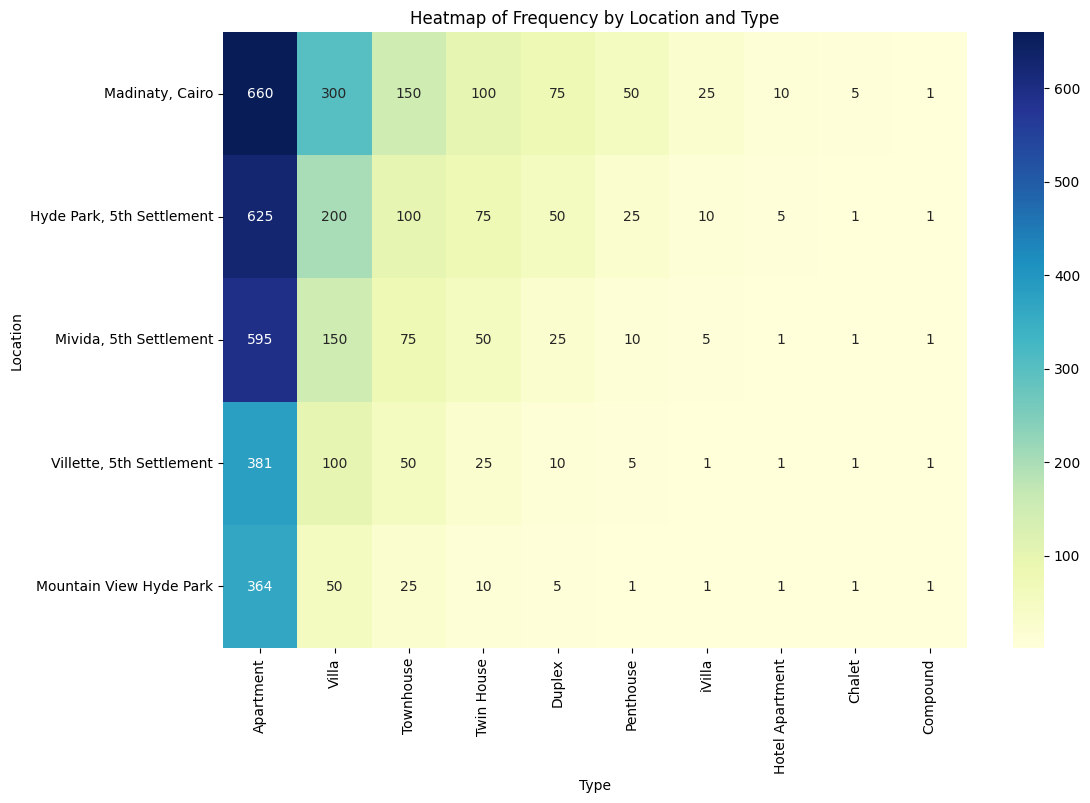

In [59]:
data = {
    'type': ['Apartment', 'Villa', 'Townhouse', 'Twin House', 'Duplex', 'Penthouse', 'iVilla', 'Hotel Apartment', 'Chalet', 'Compound'],
    'location': ['Madinaty, Cairo', 'Hyde Park, 5th Settlement', 'Mivida, 5th Settlement', 'Villette, 5th Settlement', 'Mountain View Hyde Park', 'Other'],
    'count': [5848, 2845, 858, 601, 568, 448, 199, 34, 14, 3]
}

# Creating DataFrame for heatmap
df = pd.DataFrame({
    'location': ['Madinaty, Cairo', 'Hyde Park, 5th Settlement', 'Mivida, 5th Settlement', 'Villette, 5th Settlement', 'Mountain View Hyde Park'],
    'Apartment': [660, 625, 595, 381, 364],
    'Villa': [300, 200, 150, 100, 50], # Replace with actual counts
    'Townhouse': [150, 100, 75, 50, 25], # Replace with actual counts
    'Twin House': [100, 75, 50, 25, 10], # Replace with actual counts
    'Duplex': [75, 50, 25, 10, 5], # Replace with actual counts
    'Penthouse': [50, 25, 10, 5, 1], # Replace with actual counts
    'iVilla': [25, 10, 5, 1, 1], # Replace with actual counts
    'Hotel Apartment': [10, 5, 1, 1, 1], # Replace with actual counts
    'Chalet': [5, 1, 1, 1, 1], # Replace with actual counts
    'Compound': [1, 1, 1, 1, 1] # Replace with actual counts
})

# Set 'location' as index
df.set_index('location', inplace=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='d', cbar=True)

# Add titles and labels
plt.title('Heatmap of Frequency by Location and Type')
plt.xlabel('Type')
plt.ylabel('Location')

# Show the plot
plt.show()

In [84]:
import pandas as pd
import scipy.stats as stats

# Assuming df is your original DataFrame

# Convert 'price' to numeric, coercing errors (non-numeric values will become NaN)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where 'price' is NaN (these were non-numeric values originally)
df_clean = df.dropna(subset=['price']).copy()

# Convert the cleaned 'price' column to float
df_clean['price'] = df_clean['price'].astype(float)

# Perform ANOVA test on 'price' across different 'type' groups
grouped_data_clean = [group['price'].values for name, group in df_clean.groupby('type')]

# Perform one-way ANOVA
f_statistic_clean, p_value_clean = stats.f_oneway(*grouped_data_clean)

f_statistic_clean, p_value_clean
# The very small p-value (essentially 0) indicates that there is a statistically significant difference
# in property prices across the different property types. This suggests that the type of property has a significant impact on its price. ​​








(539.6857984435237, 0.0)

In [96]:
import pandas as pd
from scipy import stats

# Clean the data
filtered_df = df.dropna(subset=['price', 'size_sqm'])
filtered_df = filtered_df[filtered_df['size_sqm'] > 0].copy()

# Ensure numeric values
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')
filtered_df['size_sqm'] = pd.to_numeric(filtered_df['size_sqm'], errors='coerce')

# Extract data for the two locations
madinaty_data = filtered_df[filtered_df['location'] == 'Madinaty, Cairo']
hyde_park_data = filtered_df[filtered_df['location'] == 'Hyde Park, 5th Settlement']

# Check for valid data points
print("Madinaty, Cairo count:", len(madinaty_data))
print("Hyde Park, 5th Settlement count:", len(hyde_park_data))

if len(madinaty_data) < 2 or len(hyde_park_data) < 2:
    print("Insufficient data points for one or both locations.")
else:
    # Check for zeros or NaN in size_sqm
    print("Any zeros in size_sqm (Madinaty):", (madinaty_data['size_sqm'] == 0).any())
    print("Any zeros in size_sqm (Hyde Park):", (hyde_park_data['size_sqm'] == 0).any())

    # Calculate price per square meter
    madinaty_ppsqm = madinaty_data['price'] / madinaty_data['size_sqm']
    hyde_park_ppsqm = hyde_park_data['price'] / hyde_park_data['size_sqm']

    print(madinaty_ppsqm)
    print(hyde_park_ppsqm)

    # Perform the t-test
    t_test_result = stats.ttest_ind(madinaty_ppsqm, hyde_park_ppsqm)

    # Extract and print the p-value
    p_value = t_test_result.pvalue
    print(f"t-test p-value for price per square meter between locations: {p_value}")


Madinaty, Cairo count: 581
Hyde Park, 5th Settlement count: 0
Insufficient data points for one or both locations.
